**Goals**
Learn to:

1. Blur images with various low pass filters
2. Apply custom-made filters to images (2D convolution)

#### 2D Convolution ( Image Filtering )

[https://docs.opencv.org/master/d4/d13/tutorial_py_filtering.html]

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/PythonImage1.jpg')
print(img.shape)
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.figure(figsize=(12, 12))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xlabel("X-axis"),plt.ylabel("X-axis")
plt.xticks([50,100,150,200,250]), plt.yticks([50,10,150,200,250])

plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xlabel("X-axis"),plt.ylabel("X-axis")
plt.xticks([50,100,150,200,250]), plt.yticks([50,10,150,200,250])

plt.show()

ModuleNotFoundError: No module named 'matplotlib'

#### Image Blurring (Image Smoothing)

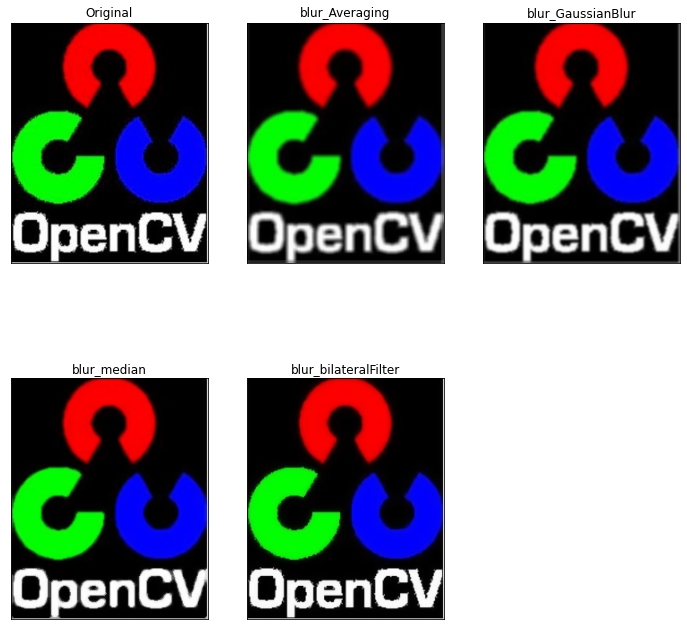

In [30]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img/PythonImage1.jpg')
blur_Averaging = cv.blur(img,(5,5))
blur_GaussianBlur = cv.GaussianBlur(img,(5,5),0)
blur_median = cv.medianBlur(img,5)
blur_bilateralFilter = cv.bilateralFilter(img,9,75,75)

plt.figure(figsize=(12,12))

plt.subplot(231),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(232),plt.imshow(blur_Averaging),plt.title('blur_Averaging')
plt.xticks([]), plt.yticks([])

plt.subplot(233),plt.imshow(blur_GaussianBlur),plt.title('blur_GaussianBlur')
plt.xticks([]), plt.yticks([])

plt.subplot(234),plt.imshow(blur_median),plt.title('blur_median')
plt.xticks([]), plt.yticks([])

plt.subplot(235),plt.imshow(blur_bilateralFilter),plt.title('blur_bilateralFilter')
plt.xticks([]), plt.yticks([])

plt.show()

#### Canny Algorithm

In [32]:
#Zero-parameter, automatic Canny edge detection with Python and OpenCV
# import the necessary packages
import numpy as np
import argparse
import glob
import cv2
def auto_canny(image, sigma=0.33):
	# compute the median of the single channel pixel intensities
	v = np.median(image)
	# apply automatic Canny edge detection using the computed median
	lower = int(max(0, (1.0 - sigma) * v))#sigma = 0.33 The best practice
	upper = int(min(255, (1.0 + sigma) * v))
	edged = cv2.Canny(image, lower, upper)
	# return the edged image
	return edged

In [34]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--images", required=True,
	help="path to input dataset of images")
args = vars(ap.parse_args())
# loop over the images
for imagePath in glob.glob(args["images"] + "/*.jpg"):
	# load the image, convert it to grayscale, and blur it slightly
	image = cv2.imread('img/auto_canny_dolphin.png')
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
	blurred = cv2.GaussianBlur(gray, (3, 3), 0)
	# apply Canny edge detection using a wide threshold, tight
	# threshold, and automatically determined threshold
	wide = cv2.Canny(blurred, 10, 200)
	tight = cv2.Canny(blurred, 225, 250)
	auto = auto_canny(blurred)
	# show the images
	cv2.imshow("Original", image)
	cv2.imshow("Edges", np.hstack([wide, tight, auto]))
	cv2.waitKey(0)

usage: ipykernel_launcher.py [-h] -i IMAGES
ipykernel_launcher.py: error: the following arguments are required: -i/--images


SystemExit: 2